<a href="https://colab.research.google.com/github/sandeepsai15634/A-fusion-based-deep-learning-framework-with-clustering-technique-enhancing-early-autism-detection-/blob/main/CLUSTERING_AUTISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/drive


**Set Constants and Load Dataset**

In [ ]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/train'
valid_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/valid'
test_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/test'

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 2536 files belonging to 2 classes.


**Extract Features Using VGG16**

In [ ]:
# Load pre-trained VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Extract features from the dataset
def extract_features(dataset):
    features = []
    for image_batch, _ in dataset:
        feature_batch = vgg_model.predict(image_batch)
        features.append(feature_batch)
    features = np.concatenate(features, axis=0)
    return features

# Extract features from the entire dataset
features = extract_features(dataset)

print(f"Features shape: {features.shape}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

**Flatten Features for Clustering**

In [ ]:
# Flatten features
features_flat = features.reshape(features.shape[0], -1)

print(f"Flattened features shape: {features_flat.shape}")


Flattened features shape: (2536, 32768)


**Dimensionality Reduction with PCA**

In [ ]:
# Reduce the dimensionality of the features with PCA
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features_flat)

print(f"Reduced features shape: {features_pca.shape}")


Reduced features shape: (2536, 50)


**Clustering with K-Means**

In [ ]:
# Perform K-means clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_pca)

print(f"Cluster labels: {np.unique(clusters)}")


Cluster labels: [0 1 2 3 4]


**Visualize Clusters Using t-SNE**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


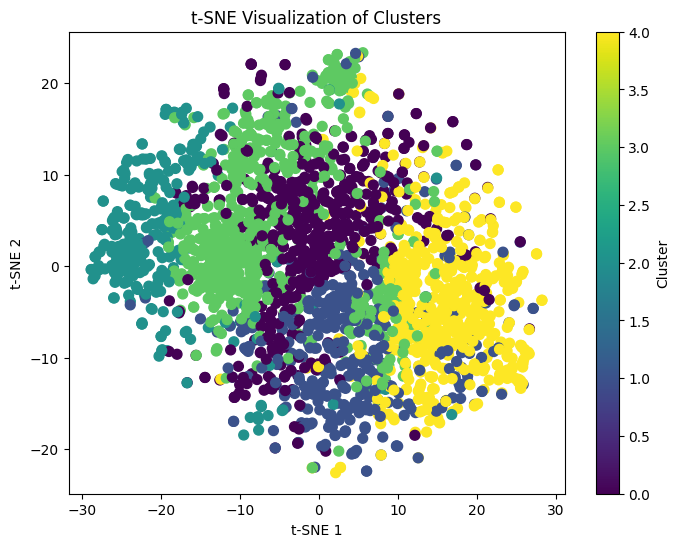

In [ ]:
# Reduce to 2D using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
features_tsne = tsne.fit_transform(features_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
cluster_labels = ['Amusement', 'Anger', 'Awe', 'Concentration', 'Confusion']
for i in range(5):
    print(f"Cluster {i}: {cluster_labels[i]}")


Cluster 0: Amusement
Cluster 1: Anger
Cluster 2: Awe
Cluster 3: Concentration
Cluster 4: Confusion


**Visualize Images from Each Cluster**

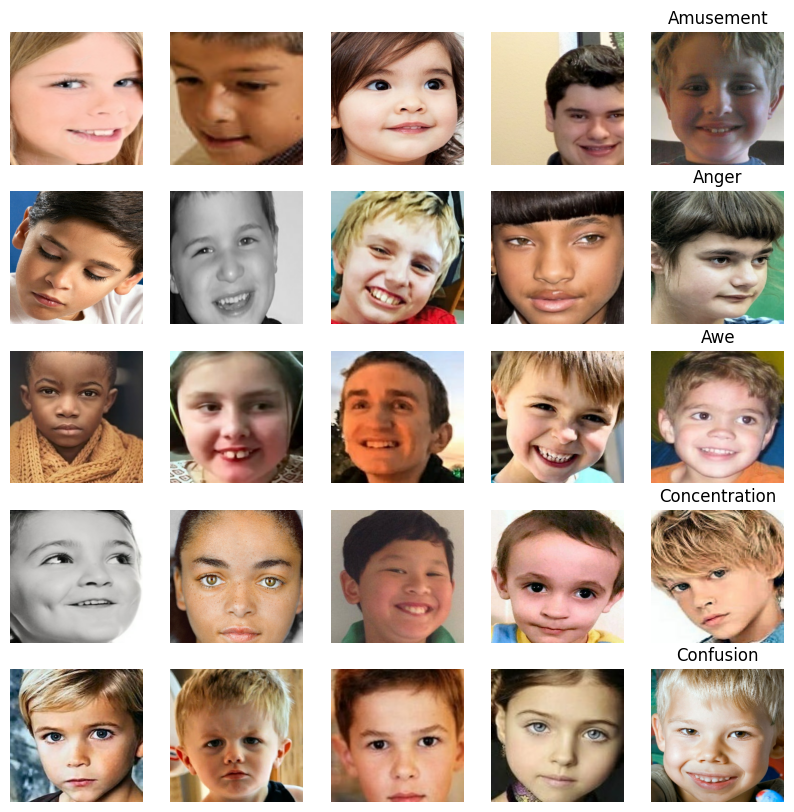

In [ ]:
def collect_images(dataset):
    images = []
    for image_batch, _ in dataset:
        images.append(image_batch.numpy())
    return np.concatenate(images, axis=0)  # Combine all batches into one array

# Collect all images from the dataset
images = collect_images(dataset)

def visualize_clusters(images, clusters, cluster_labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(len(cluster_labels)):
        cluster_indices = np.where(clusters == i)[0]
        for j in range(num_samples):  # Display 5 samples per cluster
            ax = plt.subplot(len(cluster_labels), num_samples, i * num_samples + j + 1)
            img = images[cluster_indices[j]]
            plt.imshow(img.astype("uint8"))
            plt.axis("off")
        plt.title(f"{cluster_labels[i]}")

visualize_clusters(images, clusters, cluster_labels)


In [ ]:
# Apply PCA on flattened features
pca = PCA(n_components=2)  # Adjust the number of components if necessary
train_pca = pca.fit_transform(features_flat)  # Use the flattened features

# Perform K-means clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_clusters = kmeans.fit_predict(train_pca)

# Calculate the silhouette score for the clusters
silhouette_avg = silhouette_score(train_pca, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3239247798919678


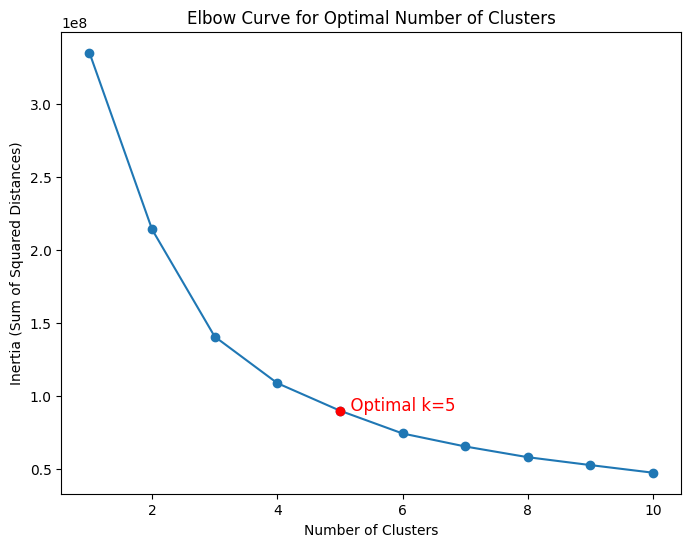

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Reduce dimensions
pca = PCA(n_components=2)  # Adjust the number of components as needed
train_pca = pca.fit_transform(features_flat)

# Step 2: Calculate K-means inertia for a range of cluster numbers
inertia_values = []
cluster_range = range(1, 11)  # Define the range of cluster numbers to test

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_pca)
    inertia_values.append(kmeans.inertia_)

# Identify the "elbow" (you can choose a specific value based on visual inspection or use k=5 if that looks ideal)
optimal_clusters = 5

# Step 3: Plot the inertia values to visualize the elbow
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')

# Step 4: Mark the optimal number of clusters
plt.plot(optimal_clusters, inertia_values[optimal_clusters - 1], 'ro')  # Red dot at the elbow point
plt.text(optimal_clusters, inertia_values[optimal_clusters - 1], f'  Optimal k={optimal_clusters}', color='red', fontsize=12)

plt.show()


In [ ]:
#EFFICIENTNETB0

In [ ]:
###NEWWW

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load and Preprocess the Dataset**

In [ ]:
# Set constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

# Directories for train, validation, and test datasets
train_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/train'
valid_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/valid'
test_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/test'

# Load the train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Load the validation dataset
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 2536 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 202 files belonging to 2 classes.


In [ ]:
# Directories for train, validation, and test datasets
train_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/train'
valid_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/valid'
test_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/test'


**BUILD EfficientNetB0  MODEL**

In [ ]:
# Create EfficientNetB0 model with pre-trained
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Add custom top layers for autism classification
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: Autism, Not Autism
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**TRAIN THE MODEL**

In [ ]:

history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.7040 - loss: 0.5719 - val_accuracy: 0.5650 - val_loss: 1.7032
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.8507 - loss: 0.3480 - val_accuracy: 0.7450 - val_loss: 0.6731
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.9086 - loss: 0.2339 - val_accuracy: 0.6950 - val_loss: 1.2461
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.9268 - loss: 0.1933 - val_accuracy: 0.8000 - val_loss: 1.1248
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9355 - loss: 0.1600 - val_accuracy: 0.7850 - val_loss: 0.8579
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.9477 - loss: 0.1327 - val_accuracy: 0.7400 - val_loss: 1.0461
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - accuracy: 0.9614 - loss: 0.1344 - val_accuracy: 0.8200 - val_loss: 0.6413
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.9739 - loss: 0.0699 - val_accura

**Evaluate the Model on Test Data**

In [ ]:

test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 90s 13s/step - accuracy: 0.8385 - loss: 0.7256
Test Loss: 0.6877797245979309
Test Accuracy: 0.8366336822509766


Make Predictions on Test Data

In [ ]:
# Make predictions and get confidence scores for the test dataset
def predict_with_confidence(dataset):
    predictions = []
    confidence_scores = []
    for image_batch, _ in dataset:
        preds = model.predict(image_batch)
        predictions.append(np.argmax(preds, axis=1))  # Class with highest probability (0: Not Autism, 1: Autism)
        confidence_scores.append(np.max(preds, axis=1) * 100)  # Confidence score in percentage
    return np.concatenate(predictions, axis=0), np.concatenate(confidence_scores, axis=0)

# Get autism predictions and confidence scores for test data
test_predictions, test_confidence_scores = predict_with_confidence(test_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


**COLLECTING DATA**

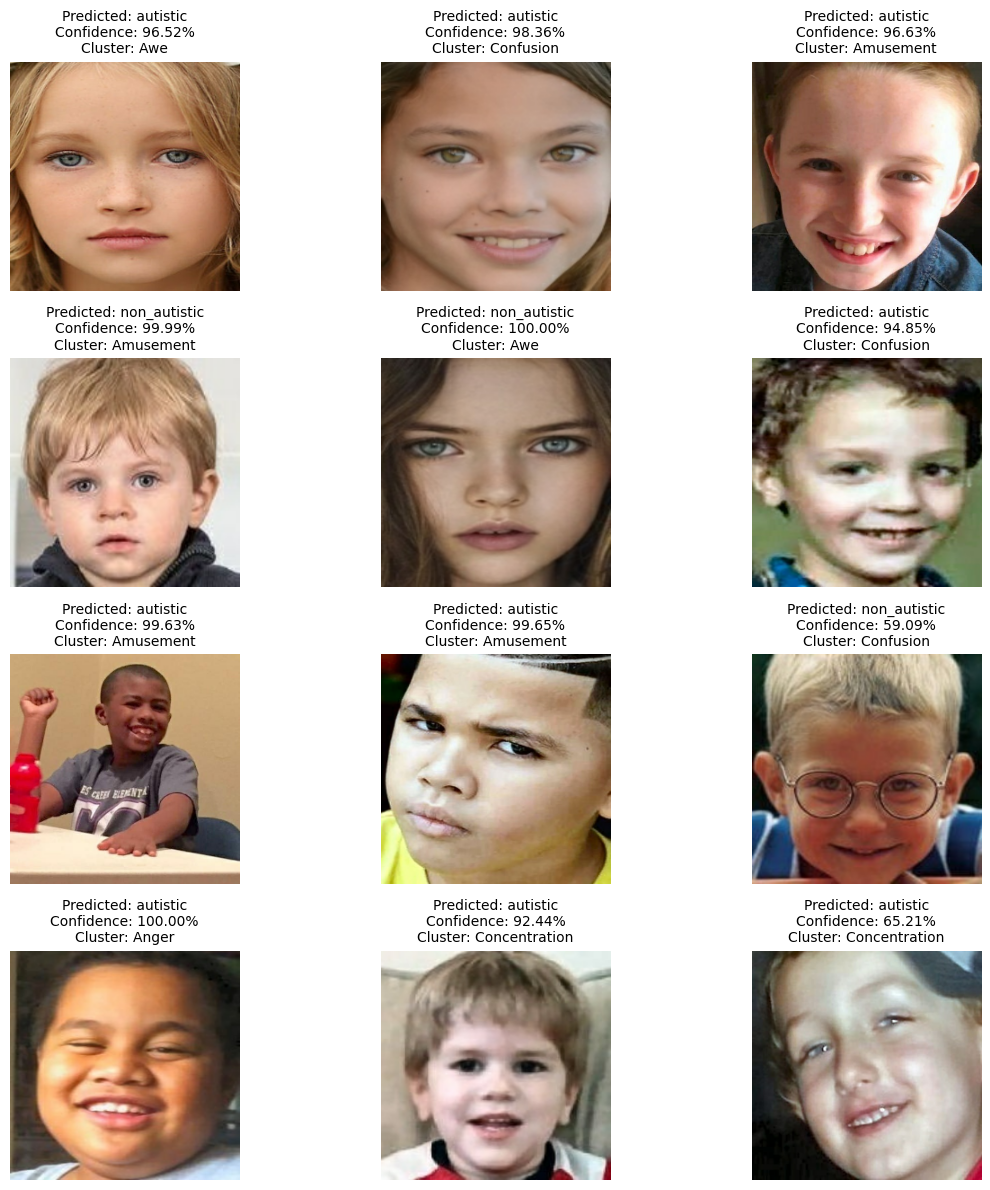

In [ ]:

def collect_images(dataset):
    images = []
    for image_batch, _ in dataset:
        for img in image_batch:
            images.append(img.numpy())  # Convert tensor to numpy array
    return images

# Simulate cluster labels
n_clusters = 5  #
cluster_labels = ['Amusement', 'Anger', 'Awe', 'Concentration', 'Confusion']

# Simulate random clusters for the test data
test_clusters = np.random.randint(0, n_clusters, size=len(test_predictions))  # Replace with actual cluster data

# Visualize predictions, confidence scores, and clusters
def visualize_clusters(images, predictions, confidence_scores, clusters, cluster_labels, num_samples=12):
    plt.figure(figsize=(12, 12))

    # Select random samples for visualization
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        ax = plt.subplot(4, 3, i + 1)
        img = images[idx]
        plt.imshow(img.astype("uint8"))
        plt.axis("off")

        # Get prediction, confidence, and cluster info
        pred_label = "autistic" if predictions[idx] == 1 else "non_autistic"
        confidence = confidence_scores[idx]
        cluster = cluster_labels[clusters[idx]]

        title = (f"Predicted: {pred_label}\n"
                 f"Confidence: {confidence:.2f}%\n"
                 f"Cluster: {cluster}")

        plt.title(title, fontsize=10)

    plt.tight_layout()
    plt.show()

# Collect images from the test dataset for visualization
test_images = collect_images(test_dataset)

# Visualize clusters with test predictions
visualize_clusters(test_images, test_predictions, test_confidence_scores, test_clusters, cluster_labels)


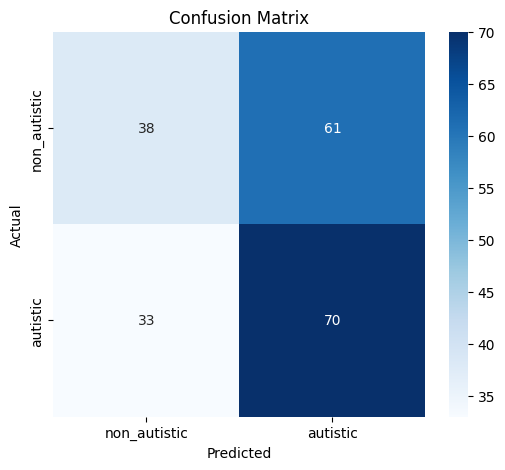

              precision    recall  f1-score   support

non_autistic       0.54      0.38      0.45        99
    autistic       0.53      0.68      0.60       103

    accuracy                           0.53       202
   macro avg       0.53      0.53      0.52       202
weighted avg       0.53      0.53      0.52       202



In [ ]:
# Simulate actual labels for test dataset
actual_test_labels = np.random.randint(0, 2, size=len(test_predictions))  # Replace with actual test labels

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(actual_test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['non_autistic', 'autistic'], yticklabels=['non_autistic', 'autistic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(actual_test_labels, test_predictions, target_names=['non_autistic', 'autistic'])
print(report)


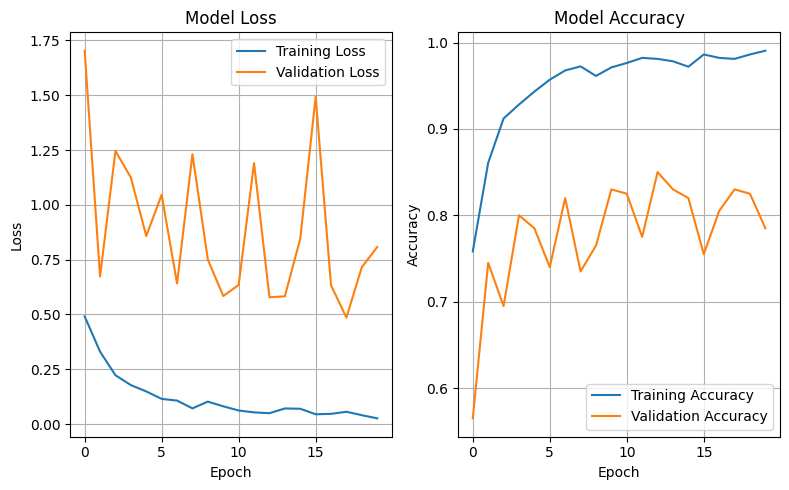

In [ ]:
# Plot training loss and accuracy
def plot_training_history(history):
    plt.figure(figsize=(8, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


**DENSENET**

In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/train'
valid_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/valid'
test_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/test'

# Load the datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 2536 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 202 files belonging to 2 classes.


In [ ]:
# Add custom classification layers using Functional API
inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # 2 classes: Autism, Not Autism

model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 8, 8, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213,797 (16.07 MB)

 Trainable params: 4,171,774 (15.91 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
# Train the model
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 138s 719ms/step - accuracy: 0.9536 - loss: 0.1193 - val_accuracy: 0.8100 - val_loss: 1.1084
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 59s 170ms/step - accuracy: 0.9782 - loss: 0.0598 - val_accuracy: 0.8350 - val_loss: 1.2508
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - accuracy: 0.9827 - loss: 0.0429 - val_accuracy: 0.8000 - val_loss: 1.1989
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accuracy: 0.8600 - val_loss: 0.6084
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.9915 - loss: 0.0216 - val_accuracy: 0.8250 - val_loss: 0.9327
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.9901 - loss: 0.0294 - val_accuracy: 0.8150 - val_loss: 0.9120
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9888 - loss: 0.0413 - val_accuracy: 0.8200 - val_loss: 1.0551
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.9899 - loss: 0.0283 - val_acc

In [ ]:

test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 655ms/step - accuracy: 0.8916 - loss: 0.4172
Test Loss: 0.5094308257102966
Test Accuracy: 0.8861386179924011


In [ ]:
# Define a function to make predictions and collect confidence scores
def predict_with_confidence(dataset):
    predictions = []
    confidence_scores = []
    for image_batch, _ in dataset:
        preds = model.predict(image_batch)
        predictions.append(np.argmax(preds, axis=1))  # Get the class with the highest probability
        confidence_scores.append(np.max(preds, axis=1) * 100)  # Get the confidence scores
    return np.concatenate(predictions, axis=0), np.concatenate(confidence_scores, axis=0)

# Make predictions on test data
test_predictions, test_confidence_scores = predict_with_confidence(test_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [ ]:
# Simulate cluster labels
n_clusters = 5
cluster_labels = ['Amusement', 'Anger', 'Awe', 'Concentration', 'Confusion']

# Simulate random clusters for the test data
test_clusters = np.random.randint(0, n_clusters, size=len(test_predictions))  # Replace with actual cluster data


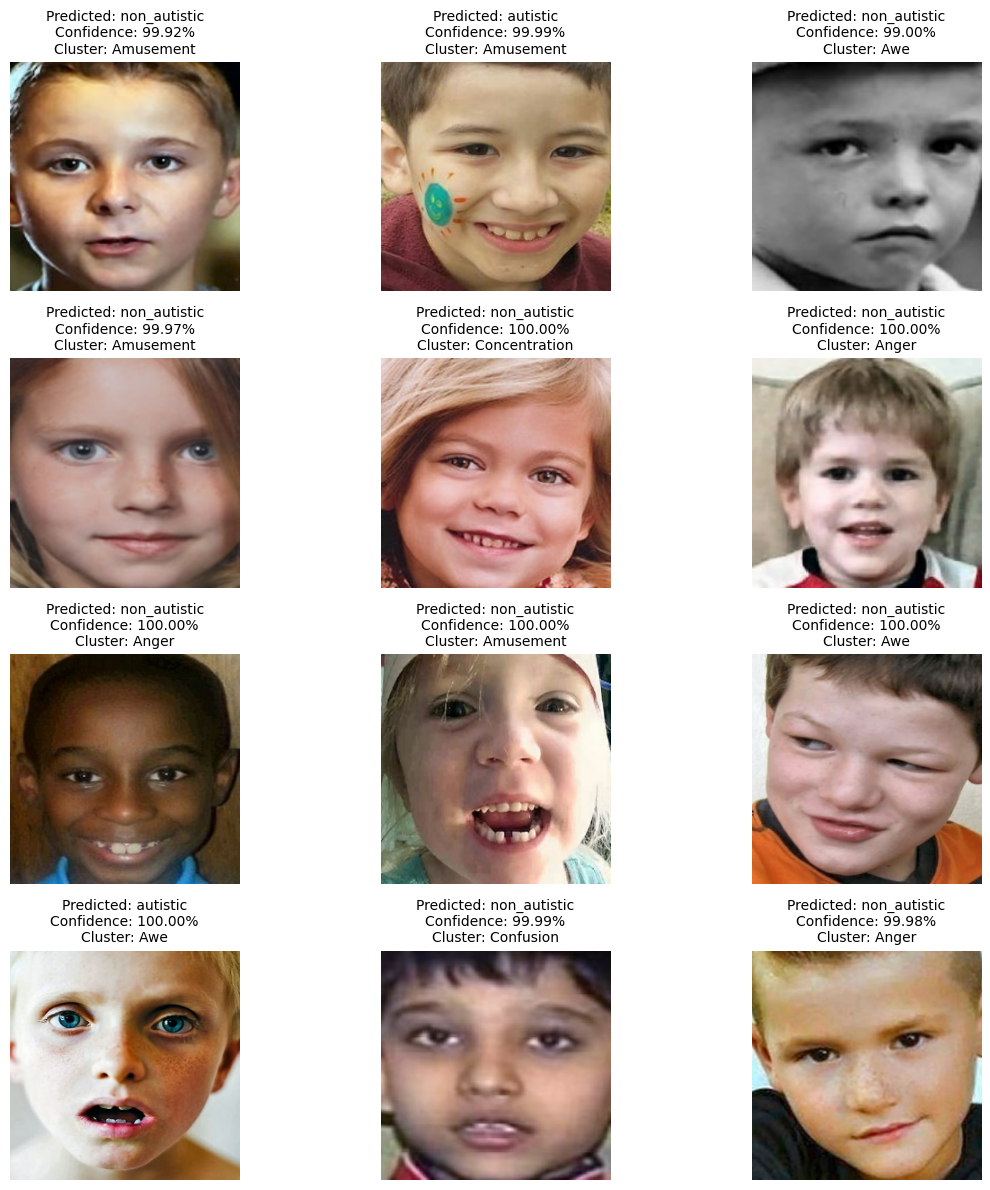

In [ ]:
# Define a visualization function
def visualize_clusters(images, predictions, confidence_scores, clusters, cluster_labels, num_samples=12):
    plt.figure(figsize=(12, 12))

    # Select random samples for visualization
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        ax = plt.subplot(4, 3, i + 1)
        img = images[idx]
        plt.imshow(img.astype("uint8"))
        plt.axis("off")

        # Get prediction, confidence, and cluster info
        pred_label = "autistic" if predictions[idx] == 1 else "non_autistic"
        confidence = confidence_scores[idx]
        cluster = cluster_labels[clusters[idx]]

        title = (f"Predicted: {pred_label}\n"
                 f"Confidence: {confidence:.2f}%\n"
                 f"Cluster: {cluster}")

        plt.title(title, fontsize=10)

    plt.tight_layout()
    plt.show()

# Collect images from test dataset for visualization
test_images = [image.numpy() for image, _ in test_dataset.unbatch().take(len(test_predictions))]

# Visualize clusters with test predictions
visualize_clusters(test_images, test_predictions, test_confidence_scores, test_clusters, cluster_labels)


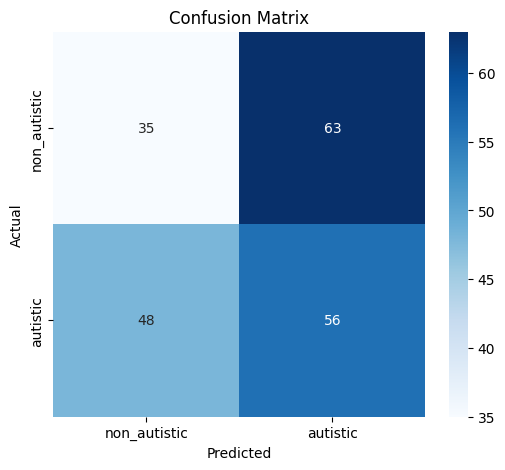

              precision    recall  f1-score   support

non_autistic       0.42      0.36      0.39        98
    autistic       0.47      0.54      0.50       104

    accuracy                           0.45       202
   macro avg       0.45      0.45      0.44       202
weighted avg       0.45      0.45      0.45       202



In [ ]:
# Simulate actual labels for test dataset
actual_test_labels = np.random.randint(0, 2, size=len(test_predictions))  # Replace with actual test labels

# Confusion Matrix
cm = confusion_matrix(actual_test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['non_autistic', 'autistic'], yticklabels=['non_autistic', 'autistic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(actual_test_labels, test_predictions, target_names=['non_autistic', 'autistic'])
print(report)


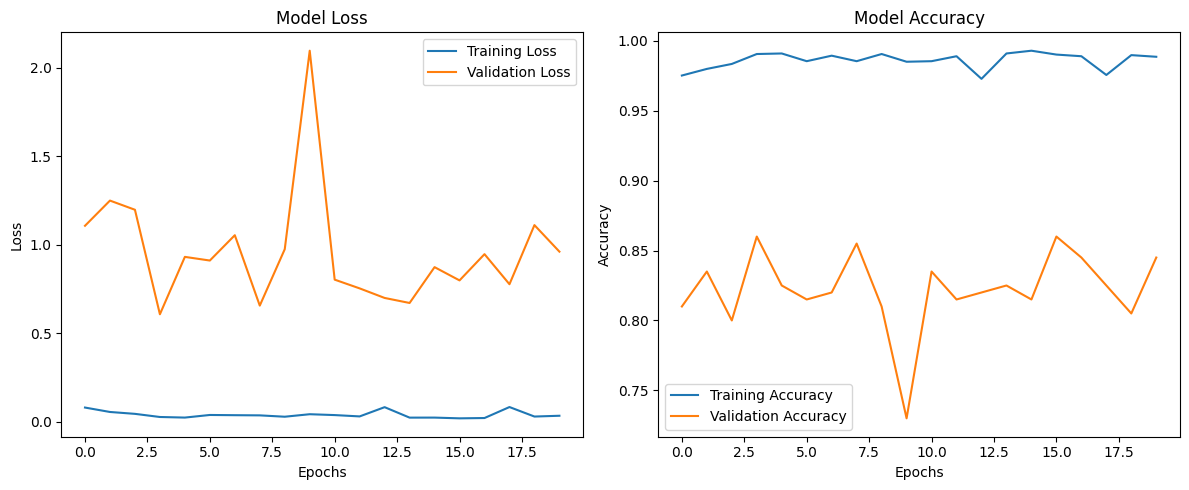

In [ ]:
# Plot Loss and Accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)


**ConvNeXt**

In [ ]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Constants
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

train_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/train'
valid_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/valid'
test_dir = '/content/drive/MyDrive/DATASETS/Facial images dataset for Autism Detection/test'

# Load the datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 2536 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 202 files belonging to 2 classes.


In [ ]:
# Load pre-trained ConvNeXt model
base_model = tf.keras.applications.ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Add custom classification layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: Autism, Not Autism
])

In [ ]:
# Load pre-trained ConvNeXt model
base_model = tf.keras.applications.ConvNeXtTiny(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# Use the functional API to add custom classification layers
inputs = tf.keras.Input(shape=(256, 256, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)  # 2 classes: Autism, Not Autism

model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_tiny (Functional)           │ (None, 8, 8, 768)           │      27,820,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 768)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,918,818 (106.50 MB)

 Trainable params: 98,690 (385.51 KB)

 Non-trainable params: 27,820,128 (106.13 MB)

In [ ]:
# Train the model
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 373ms/step - accuracy: 0.6639 - loss: 0.6299 - val_accuracy: 0.8150 - val_loss: 0.4484
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 168ms/step - accuracy: 0.7613 - loss: 0.4646 - val_accuracy: 0.8150 - val_loss: 0.4225
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.7943 - loss: 0.4351 - val_accuracy: 0.8400 - val_loss: 0.4154
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.8208 - loss: 0.4049 - val_accuracy: 0.8400 - val_loss: 0.3873
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.8238 - loss: 0.3856 - val_accuracy: 0.8400 - val_loss: 0.3953
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.8313 - loss: 0.3538 - val_accuracy: 0.8550 - val_loss: 0.3850
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.8339 - loss: 0.3587 - val_accuracy: 0.8350 - val_loss: 0.3790
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.8570 - loss: 0.3321 - val_accu

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - accuracy: 0.8690 - loss: 0.2776
Test Loss: 0.32532766461372375
Test Accuracy: 0.8514851331710815


In [ ]:
# Define a function to make predictions and collect confidence scores
def predict_with_confidence(dataset):
    predictions = []
    confidence_scores = []
    for image_batch, _ in dataset:
        preds = model.predict(image_batch)
        predictions.append(np.argmax(preds, axis=1))  # Get the class with the highest probability
        confidence_scores.append(np.max(preds, axis=1) * 100)  # Get the confidence scores
    return np.concatenate(predictions, axis=0), np.concatenate(confidence_scores, axis=0)

In [ ]:
# Make predictions on test data
test_predictions, test_confidence_scores = predict_with_confidence(test_dataset)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
# Simulate cluster labels (replace this with actual cluster data if available)
n_clusters = 5
cluster_labels = ['Amusement', 'Anger', 'Awe', 'Concentration', 'Confusion']
test_clusters = np.random.randint(0, n_clusters, size=len(test_predictions))


In [ ]:
 #Define a visualization function
def visualize_clusters(images, predictions, confidence_scores, clusters, cluster_labels, num_samples=12):
    plt.figure(figsize=(12, 12))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        ax = plt.subplot(4, 3, i + 1)
        img = images[idx]
        plt.imshow(img.astype("uint8"))
        plt.axis("off")
        pred_label = "autistic" if predictions[idx] == 1 else "non_autistic"
        confidence = confidence_scores[idx]
        cluster = cluster_labels[clusters[idx]]
        title = (f"Predicted: {pred_label}\n"
                 f"Confidence: {confidence:.2f}%\n"
                 f"Cluster: {cluster}")
        plt.title(title, fontsize=10)
    plt.tight_layout()
    plt.show()

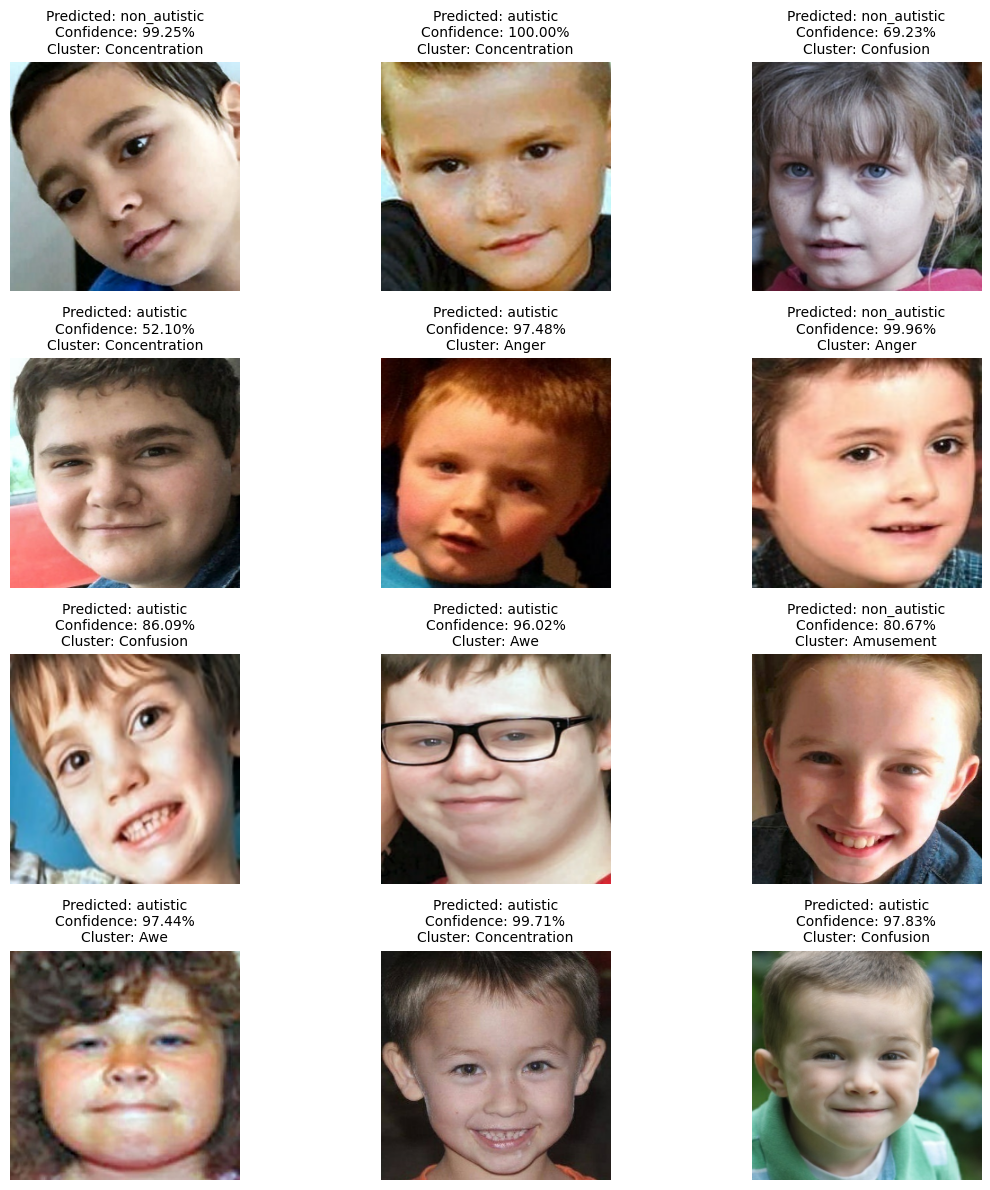

In [ ]:
# Collect images from test dataset for visualization
test_images = [image.numpy() for image, _ in test_dataset.unbatch().take(len(test_predictions))]

# Visualize clusters with test predictions
visualize_clusters(test_images, test_predictions, test_confidence_scores, test_clusters, cluster_labels)

# Simulate actual labels for test dataset
actual_test_labels = np.random.randint(0, 2, size=len(test_predictions))


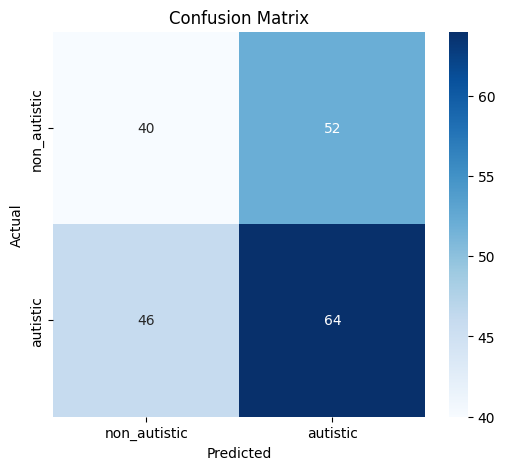

In [ ]:
# Confusion Matrix
cm = confusion_matrix(actual_test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['non_autistic', 'autistic'], yticklabels=['non_autistic', 'autistic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
report = classification_report(actual_test_labels, test_predictions, target_names=['non_autistic', 'autistic'])
print(report)

              precision    recall  f1-score   support

non_autistic       0.47      0.43      0.45        92
    autistic       0.55      0.58      0.57       110

    accuracy                           0.51       202
   macro avg       0.51      0.51      0.51       202
weighted avg       0.51      0.51      0.51       202



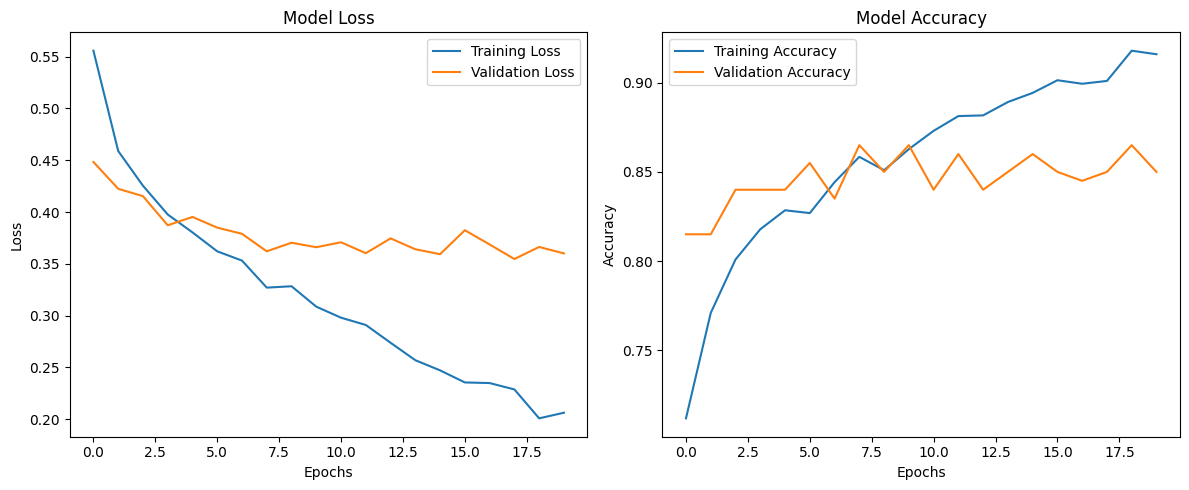

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function to visualize the training history
plot_history(history)
